In [2]:
"""Dependencies"""
# !pip install import-ipynb

# Python ≥3.7 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1.0"
print('The scikit-learn version is {}.'.format(sklearn.__version__))


import gc
import pickle
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np
from pandas.core.common import flatten
import matplotlib.pyplot as plt

#access drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

x_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/XoheImp.csv"
y_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/Y.csv"

The scikit-learn version is 1.0.2.
Mounted at /content/drive
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [4]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

Splitting data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Ridge Regression

In [6]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(C=2.15443469e+02, random_state=0, verbose=3))])

In [7]:
gc.collect()

437

In [8]:
clf1 = pipe1.fit(X_train, y_train)  # apply scaling on training data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed

In [9]:
with open('Ridge1', 'wb') as files:
    pickle.dump(clf1, files)

In [10]:
Y_pred1 = clf1.predict(X_val)

In [11]:
YpredProb1 = clf1.predict_proba(X_val)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_val, Y_pred1))
print("F1:", metrics.f1_score(y_val, Y_pred1, average="weighted"))
print("Matthew's Correlation Coefficient:", metrics.matthews_corrcoef(y_val, Y_pred1))

Accuracy: 0.953501738058637
F1: 0.9507919832370586
Matthew's Correlation Coefficient: 0.7875905716391121


In [13]:
print("ROC_AUC:", metrics.roc_auc_score(y_val, YpredProb1, multi_class = 'ovr', average = 'macro'))

TypeError: ignored

Logistic regression

In [ ]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="none",
                                                           random_state=0,
                                                           solver = "lbfgs", 
                                                           verbose=4))])

In [ ]:
gc.collect()

595

In [ ]:
clf2= pipe2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed

In [ ]:
with open('Logistic', 'wb') as files:
    pickle.dump(clf2, files)

In [ ]:
Y_pred2 = clf2.predict(X_val)

In [ ]:
YpredProb1 = clf1.predict_proba(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, Y_pred2))
print("F1:", metrics.f1_score(y_val, Y_pred2, average="weighted"))
print("Matthew's Correlation Coefficient:", metrics.matthews_corrcoef(y_val, Y_pred2))

Accuracy: 0.9546858337834282
F1: 0.9519324948607021
Matthew's Correlation Coefficient: 0.7928524909374688


In [ ]:
print("ROC_AUC:", metrics.roc_auc_score(y_val, YpredProb1, multi_class = 'ovr', average = 'macro'))

Evaluation

In [ ]:
ScoresLOG = pd.DataFrame([["Ridge", 0.9545958148101985, 0.9518542969804756, 0.7924969037344932],["no regularisation", 0.9546858337834282, 0.9519324948607021, 0.7928524909374688]], columns = ["model", "accuracy", "F1", "MCC"])

In [ ]:
ScoresLOG.to_csv("LogisticScores.csv", sep=";")

In [ ]:
ScoresLOG

,model,accuracy,F1,MCC
0,Ridge,0.954596,0.951854,0.792497
1,no regularisation,0.954686,0.951932,0.792852


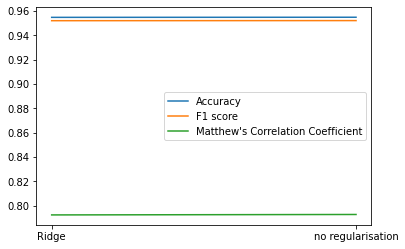

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ScoresLOG.model, ScoresLOG.accuracy, label = "Accuracy")
plt.plot(ScoresLOG.model, ScoresLOG.F1, label = "F1 score")
plt.plot(ScoresLOG.model, ScoresLOG.MCC, label = "Matthew's Correlation Coefficient")
plt.legend()
plt.show()

In [ ]:
ScoresLOG = ScoresLOG.set_index('model')

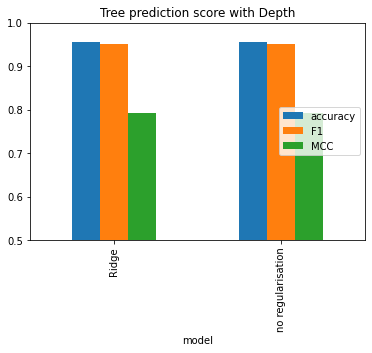

In [ ]:
ScoresLOG.plot.bar(ylim = (0.5, 1), title = 'Tree prediction score with Depth').legend(loc='center right')